# Installations

In [ ]:
from google.colab import drive
import os
import shutil
from pathlib import Path
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageDraw
from pathlib import Path
import numpy as np

import cv2

drive.mount('/content/drive')

Mounted at /content/drive


# Augmentation

In [ ]:
def shear(image):
  return image.transform(image.size, Image.AFFINE, (
      random.uniform(0.8, 1.2),
      random.uniform(-0.2, 0.2),
      random.uniform(0, image.width * 0.2),
      random.uniform(-0.2, 0.2),
      random.uniform(0.8, 1.2),
      random.uniform(0, image.height * 0.2)
  ), resample=Image.BICUBIC)

def random_reflection(image):
    if random.choice([True, False]):
        return ImageOps.mirror(image)  # Par rapport à l'axe Y
    else:
        return ImageOps.flip(image)  # Par rapport à l'axe X

def crop(image):
    left = random.randint(0, 50)
    top = random.randint(0, 50)
    right = image.width - random.randint(0, 50)
    bottom = image.height - random.randint(0, 50)
    #print(left)
   # print(top)
   # print(right)
   # print(bottom)
   # print(image.width)
   # print(image.height)
    return ImageOps.crop(image, (left, top, right, bottom))

def rotation(image):
    return image.rotate(random.uniform(-90, 90), resample=Image.BICUBIC)

def adjust_contrast(image):
    # Valeur aléatoire entre 0 et 30%
    alpha = 1.0 + random.uniform(0, 0.3)
    return ImageEnhance.Contrast(image).enhance(alpha)


def histogram_equalization_rgb(image):
    image_array = np.array(image)

    # Appliquer l'égalisation d'histogramme sur chaque canal individuellement
    equalized_channels = [cv2.equalizeHist(channel) for channel in cv2.split(image_array)]
    # Fusionner les canaux égalisés pour former l'image finale
    equalized_image_array = cv2.merge(equalized_channels)

    equalized_image_rgb = Image.fromarray(equalized_image_array, 'RGB')
    return equalized_image_rgb

def histogram_equalization(image):
    image_gray = image.convert('L')

    image_array = np.array(image_gray)
    equalized_array = cv2.equalizeHist(image_array)

    equalized_image_rgb = Image.fromarray(equalized_array).convert('RGB')
    return equalized_image_rgb

def add_rectangle(image):
    width, height = image.size
    # Coordonnées aléatoires pour le coin supérieur gauche du rectangle
    x = random.randint(0, width - 50)
    y = random.randint(0, height - 70)

    draw = ImageDraw.Draw(image)
    draw.rectangle([x, y, x + 50, y + 70], fill=(0, 0, 0))

    return image


In [ ]:
!pip install Pillow numpy opencv-python-headless

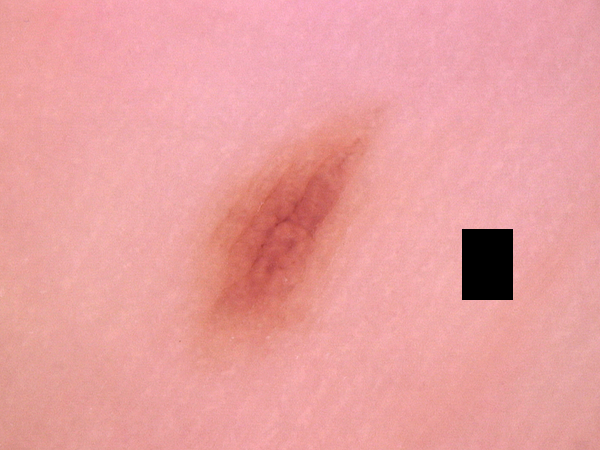

In [ ]:
from IPython.display import display

# Chargez votre image
image_path = "Naevus melanocytaire.jpg"  # Remplacez par le chemin de votre image
original_image = Image.open(image_path)

# Liste des fonctions à appliquer
transformations = [add_rectangle]

# Appliquer chaque transformation et afficher l'image
for transform in transformations:
    # Appliquer la transformation
    transformed_image = transform(original_image.copy())  # Utilisez une copie pour ne pas modifier l'originale

   # Afficher l'image transformée
    display(transformed_image)



In [ ]:
destination_folder_name = "Augmented_ROI_data_2000"
destination_folder_path = '/content/' + destination_folder_name + '/Classes'
Path(destination_folder_path).mkdir(parents=True, exist_ok=True)

base_folder_path = '/content/drive/MyDrive/Cpred/ROI_BDD_by_classe'
anomaly_folders = ['vasc', 'nv', 'mel', 'df', 'bkl', 'bcc', 'akiec']
chosen_transformation = None

for anomaly_folder in anomaly_folders:
    full_folder_path = os.path.join(base_folder_path, 'Classes', anomaly_folder)
    images_originale_path = os.listdir(full_folder_path)
    num_images = len(os.listdir(full_folder_path))
    print(anomaly_folder)
    print(num_images)

    destination_class_path = destination_folder_path + '/' + anomaly_folder
    Path(destination_class_path).mkdir(parents=True, exist_ok=True)


    # Copie des images originales
    for image_originale_path in images_originale_path:
      shutil.copy(os.path.join(full_folder_path, image_originale_path), destination_class_path)


    while num_images != 2000:

      if num_images > 2000:
        random_image_name = random.choice(os.listdir(destination_class_path))
        image_path = os.path.join(destination_class_path, random_image_name)
        try:
            os.remove(image_path)
            print(f"Nombre d'images dans {anomaly_folder}: {num_images - 1}")
            num_images -= 1

        except FileNotFoundError:
            print(f"Le fichier {image_path} n'existe pas.")
            continue

      if num_images < 2000:
          # Sélectionner une image au hasard dans le dossier d'anomalie
          random_image_name = random.choice(os.listdir(destination_class_path))
          image_path = os.path.join(destination_class_path, random_image_name)

          # Transformation
          original_image = Image.open(image_path)
          transformation_functions = [shear, random_reflection, rotation]
          chosen_transformation = random.choice(transformation_functions)
          transformed_image = chosen_transformation(original_image)

          # Copie des images transformées
          transformed_image.save(os.path.join(destination_class_path, f"transformed_image_{num_images + 1}.jpg"))

          # Afficher le résultat mis à jour
          print(f"Nombre d'images dans {anomaly_folder}: {num_images + 1}, Transformation : {chosen_transformation}")

          # Mise à jour de num_images_dict
          num_images += 1

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Nombre d'images dans df: 1067, Transformation : <function random_reflection at 0x7b8ab4c84af0>
Nombre d'images dans df: 1068, Transformation : <function add_rectangle at 0x7b8ab4c853f0>
Nombre d'images dans df: 1069, Transformation : <function random_reflection at 0x7b8ab4c84af0>
Nombre d'images dans df: 1070, Transformation : <function random_reflection at 0x7b8ab4c84af0>
Nombre d'images dans df: 1071, Transformation : <function shear at 0x7b8ab4c84a60>
Nombre d'images dans df: 1072, Transformation : <function add_rectangle at 0x7b8ab4c853f0>
Nombre d'images dans df: 1073, Transformation : <function add_rectangle at 0x7b8ab4c853f0>
Nombre d'images dans df: 1074, Transformation : <function shear at 0x7b8ab4c84a60>
Nombre d'images dans df: 1075, Transformation : <function rotation at 0x7b8ab4c84c10>
Nombre d'images dans df: 1076, Transformation : <function add_rectangle at 0x7b8ab4c853f0>
Nombre d'images dans 

*   142
*   6705
*   1113
*   115
*   1099
*   514
*   327

In [ ]:
from zipfile import ZipFile
from google.colab import files

# Dossier à télécharger
folder_to_download = '/content/Augmented_ROI_data_2000'

# Chemin pour le fichier zip
zip_file_path = '/content/Augmented_ROI_data_2000.zip'

# Créer une archive zip du dossier
shutil.make_archive(zip_file_path[:-4], 'zip', folder_to_download)

# Télécharger le fichier zip
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Processing CLAHE

In [ ]:
def preprocess_image(image_path, output_path):
    img = Image.open(image_path)

    # Appliquer le filtre de netteté
    img_sharpened = img.filter(ImageFilter.SHARPEN)

    # Appliquer le filtre CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_np = np.array(img_sharpened)
    img_clahe_np = np.stack([clahe.apply(img_np[:,:,k]) for k in range(3)], axis=-1)
    img_clahe = Image.fromarray(img_clahe_np)

    # Sauvegarder l'image traitée
    img_clahe.save(output_path)

def process_class(input_path, output_path):
    os.makedirs(output_path, exist_ok=True)

    files = os.listdir(input_path)
    print(len(files))
    for file in files:
        image_path = os.path.join(input_path, file)
        output_image_path = os.path.join(output_path, file)

        preprocess_image(image_path, output_image_path)

def split_dataset(input_folder, output_folder):
    for type_data_folder in os.listdir(input_folder):
        if type_data_folder in ["train", "test", "validation"]:
            print(type_data_folder)
            type_path = os.path.join(input_folder, type_data_folder)

            for class_folder in os.listdir(type_path):
                class_path = os.path.join(type_path, class_folder)

                if os.path.isdir(class_path):
                    print(f"Processing class: {class_folder}")
                    output_class_path = os.path.join(output_folder, type_data_folder, class_folder)

                    process_class(class_path, output_class_path)

                    print(f"Class {class_folder} processed successfully.")


In [ ]:
# Spécifiez le chemin du dossier contenant vos classes dans Google Drive
input_folder = '/content/drive/MyDrive/Cpred/Cpred_split_by_classes_train_test_val'

# Spécifiez le chemin du dossier de sortie dans Google Drive
output_folder = '/content/drive/MyDrive/Cpred/Normal_postprocessed_split_1'

split_dataset(input_folder, output_folder)

In [ ]:
# Chemin du dossier sur Google Drive
chemin_drive = "/content/drive/MyDrive/Cpred/Cpred_split_by_classes_train_test_val"
chemin_destination = "/content/Normal_preprocessed_split"
shutil.copytree(chemin_drive, chemin_destination)

shutil.make_archive("/content/Normal_preprocessed_split_archive", 'zip', "/content/drive/MyDrive/Cpred/Cpred_split_by_classes_train_test_val")

files.download("/content/Normal_preprocessed_split_archive.zip")
